In [1]:
# All Imports
import sys 
import numpy as np
import json
import requests
import urllib.request
import matplotlib.pyplot as plt
import re
import csv
#from sklearn.manifold import TSNE
#from sklearn.neighbors import NearestNeighbors
#from gensim.test.utils import common_texts

from gensim.models.doc2vec import Doc2Vec, TaggedDocument


/home/lilli/anaconda3/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [14]:
#with open('mxm_779k_matches.txt', 'r') as matches:


with open('mxm_dataset_train.txt', 'r') as t_file:
    lines = t_file.readlines()
    words = []
    tracks = []
    for line in lines:
        if line[0] == 'T':
            cols = line.split(',')
            track = {'msd_id': cols[0], 'id': cols[1], 'words': dict(elem.rstrip().split(':', 1) for elem in cols[2:])}
            tracks.append(track)
        elif line[0] == '%':
            line_stripped = line.replace('%','')
            words = line_stripped.split(',')
print(words[0])           
with open('words_dump_train.json','w') as file:
    json.dump(words,file) 

with open('tracks_train.json','w') as f:
    json.dump(tracks,f) 

i


In [31]:
with open('words_dump_train.json','r') as word_dump:
    word_dump = json.load(word_dump)
    
with open('stemmed_words.txt','r') as stemmed:
    stemmed_words = stemmed.readlines()
    stemmed_words = [w.rstrip('\n').split('\t') for w in stemmed_words]

stemmed_dict = {}
for x in stemmed_words:
    if x[1] in stemmed_dict:
        stemmed_dict[x[1]].append(x[0])
    else:
        stemmed_dict[x[1]] = [x[0]]
print(stemmed_dict['becaus'])


['because']


In [12]:
i = 0
words_plus = {}
notin = []
for word in word_dump:
    if word in stemmed_dict:
        words_plus[i] = stemmed_dict[word]
    elif word == 'gonna' or word == 'imma' or word.startswith('geh'):
        words_plus[i] = stemmed_dict['go'] + [word]
        stemmed_dict['go'] = words_plus[i]
    elif word == 'gotta' or word.startswith('hab'):
        words_plus[i] = stemmed_dict['got'] + [word]
        stemmed_dict['got'] = words_plus[i]
    elif word in ['wanna','will','wollen','wollt','willst', 'vil','veut', 'vill','veux',
                  'voglio', 'vuela', 'vuelta', 'vuelto', 'volar', 'voltar','vuol' ]:
        words_plus[i] = stemmed_dict['want'] + [word]
        stemmed_dict['want'] = words_plus[i]
    elif word == 'shoulda':
        words_plus[i] = stemmed_dict['should'] + [word]
        stemmed_dict['should'] = words_plus[i]
    elif word == 'lovin' or word in ['lieb', 'amour', 'amant', 'amar', 'amart','damour',
                                     'amo','jaim','taim', 'lamor', 'lamour','enamorado', 'cariño']:
        words_plus[i] = stemmed_dict['love'] + [word]
        stemmed_dict['love'] = words_plus[i]
    elif word in ['ich', 'io', 'ik','ikk','j','ive', 'i´m', 'i`m','ima', 'iâ\x80\x99m', 'i’ll', 'i’m', 'i’v','je' ]:
        words_plus[i] = words_plus[0] + [word]
        words_plus[0] = words_plus[i]
        stemmed_dict['i'] = words_plus[i]
        
    elif word in ['kalt', 'frío']:
        words_plus[i] = stemmed_dict['cold'] + [word]
        stemmed_dict['cold'] = words_plus[i]
        
    elif word in ['tu', 'du', 'tú','você', 'euch','vos']:
        words_plus[i] = words_plus[2] + [word]
        words_plus[2] = words_plus[2] + [word]
        stemmed_dict['you'] = stemmed_dict['you'] + [word]
        
    elif word in ['kein', 'keiner', 'keine','rien','keinen', 'nicht', 'nie', 'niemal', 'niemand', 'nient'
                 , 'kuin', 'kuinka']:
        words_plus[i] = stemmed_dict['none'] + [word]
        stemmed_dict['none'] = stemmed_dict['none'] + [word]
        
    elif word in ['allein', 'alleen', 'solament', 'soledad', 'seul', 'sólo']:
        words_plus[i] = stemmed_dict['alon'] + [word]
        stemmed_dict['alon'] = stemmed_dict['alon'] + [word]
        
    elif word in ['mi', 'mio', 'mein', 'meine', 'meinem','meiner', 'más','meinen',
                  'mes','mia','meu','mijn','mij','mina','mir','mí', 'mía', 'mío', 'minä']:
        words_plus[i] = stemmed_dict['my'] + [word]
        stemmed_dict['my'] = stemmed_dict['my'] + [word]
        
    elif word in ['dein', 'deine', 'deinem','deiner','deinen','tes','dir','tue', 
                  'tuo', 'tuoi', 'tus','dj','tas', 'te','tá','you´r', 'youâ\x80\x99r', 'you’r','votre']:
        words_plus[i] = stemmed_dict['your'] + [word]
        stemmed_dict['your'] = stemmed_dict['your'] + [word]
    
    elif word.startswith('komm') or word in ['vien', 'vient', 'viento','kom',]:
        words_plus[i] = stemmed_dict['come'] + [word]
        stemmed_dict['come'] = stemmed_dict['come'] + [word]
    
    elif word.startswith('try'):
        words_plus[i] = stemmed_dict['tri'] + [word]
        stemmed_dict['tri'] = stemmed_dict['tri'] + [word]
    
    elif word.startswith('motherfuck') or word.startswith('fuck'):
        words_plus[i] = stemmed_dict['fuck'] + [word]
        stemmed_dict['fuck'] = stemmed_dict['fuck'] + [word]
        
    elif word in ['der','das','le','les','y','il','las','dem', 'dat', 'là', 'lá','l']:
        words_plus[i] = stemmed_dict['the'] + [word]
        stemmed_dict['the'] = stemmed_dict['the'] + [word]
        words_plus[1] = stemmed_dict['the']
        
    elif word in ['ein','eine','einer','une','einem','een','einen','enää', 'quon', 'quun', 'um', 'uma','una', 'uno',
                 'quel', 'quella', 'quello', 'quelqu', 'quer', 'aan']:
        words_plus[i] = stemmed_dict['a'] + [word]
        stemmed_dict['a'] = stemmed_dict['a'] + [word]
        words_plus[5] = stemmed_dict['a']
    
    elif word in ['espejo', 'espera', 'esperando', 'esperanza', 'esperar', 'espero']:
        words_plus[i] = stemmed_dict['hope'] + [word]
        stemmed_dict['hope'] = stemmed_dict['hope'] + [word]
        
    elif word in ['do not','dont', 'don´t', 'donâ\x80\x99t', 'don’t','don`t' ]:
        words_plus[i] = stemmed_dict['do not'] + [word]
        stemmed_dict['do not'] = stemmed_dict['do not'] + [word]
    
    elif word in ['nigga', 'niggaz']:
        words_plus[i] = stemmed_dict['nigger'] + [word]
        stemmed_dict['nigger'] = stemmed_dict['nigger'] + [word]
    
    elif word in ['glück', 'bonheur', 'felicidad', 'feliz']:
        words_plus[i] = stemmed_dict['luck'] + [word]
        stemmed_dict['luck'] = stemmed_dict['luck'] + [word]
    
    elif word in ['herz', 'corazon', 'coeur','cara','coraz', 'corazon', 'corazón', 'coração']:
        words_plus[i] = stemmed_dict['heart'] + [word]
        stemmed_dict['heart'] = stemmed_dict['heart'] + [word]
    
    elif word in ['brauch','besoin','besoi','beso','soll','sollst','sollen','doi','doit']:
        words_plus[i] = stemmed_dict['need'] + [word]
        stemmed_dict['need'] = stemmed_dict['need'] + [word]
    
    elif word in ['himmel','ciel', 'cielo']:
        words_plus[i] = stemmed_dict['sky'] + [word]
        stemmed_dict['sky'] = stemmed_dict['sky'] + [word]
    
    elif word in ['leb','leben', 'liv', 'livet', 'vez', 'vi', 'vida', 'viver','vivir']:
        words_plus[i] = stemmed_dict['live'] + [word]
        stemmed_dict['live'] = stemmed_dict['live'] + [word]
    
    elif word in ['glaub','creer', 'creo','croi', 'croir', 'denk', 'piensa', 'pienso']:
        words_plus[i] = stemmed_dict['believ'] + [word]
        stemmed_dict['believ'] = stemmed_dict['believ'] + [word]
    
    elif word in ['wissen','sais', 'sci', 'weiß', 'weißt','sait','savoir']:
        words_plus[i] = stemmed_dict['know'] + [word]
        stemmed_dict['know'] = stemmed_dict['know'] + [word]
    
    elif word in ['se','sehen', 'seh', 'voir', 'vois','voi', 'voit', 'voix','siehst','visto','vuoi','blick']:
        words_plus[i] = stemmed_dict['see'] + [word]
        stemmed_dict['see'] = stemmed_dict['see'] + [word]
    
    elif word in ['gefühl', 'sentido', 'sentimiento', 'sentir', 'sento', 'pasion', 'pasión']:
        words_plus[i] = stemmed_dict['feel'] + [word]
        stemmed_dict['feel'] = stemmed_dict['feel'] + [word]
    
    elif word in ['blut', 'sangu', 'sangr']:
        words_plus[i] = stemmed_dict['blood'] + [word]
        stemmed_dict['blood'] = stemmed_dict['blood'] + [word]
    
    elif word in ['weil', 'da', 'denn','coz','wenn','‘caus']:
        words_plus[i] = stemmed_dict['becaus'] + [word]
        stemmed_dict['becaus'] = stemmed_dict['becaus'] + [word]
    
    elif word in ['gangsta']:
        words_plus[i] = stemmed_dict['gangster'] + [word]
        stemmed_dict['gangster'] = stemmed_dict['gangster'] + [word]
    
    elif word in ['besser','mieux', 'melhor', 'mejor']:
        words_plus[i] = stemmed_dict['better'] + [word]
        stemmed_dict['better'] = stemmed_dict['better'] + [word]
    
    elif word in ['gibt','gimme']:
        words_plus[i] = stemmed_dict['give'] + [word]
        stemmed_dict['give'] = stemmed_dict['give'] + [word]
    
    elif word in ['kan','kann','kannst','pu','puo', 'pode', 'poder','peu', 'peut', 'peux',]:
        words_plus[i] = stemmed_dict['can'] + [word]
        stemmed_dict['can'] = stemmed_dict['can'] + [word]
        
    elif word in ['be','am','est', 'sein', 'aint', 'bist','ces', 'cest', 'est', 'esta','será', 'sient', 
                  'siento', 'estaba', 'estamo','sei', 'estar', 'estc', 'esto', 'estou', 'estoy', 'está', 
                  'están', 'esté','eu','som','és', 'était', 'être','zijn','siamo','wirst', 'werd',
                  'sono', 'somo','es', 'sont', 'dêtre', 'sim', 'sind','cè', 'cétait', 'werden','wär','we’r','eso']:
        words_plus[i] = stemmed_dict['be'] + [word]
        stemmed_dict['be'] = stemmed_dict['be'] + [word]
        words_plus[24] = stemmed_dict['be']

    elif word.endswith('in') and len(word) > 3:
        newword = word[:-3] if (word.endswith('nnin') or word.endswith('ppin') 
                                or word.endswith('ggin')or word.endswith('ttin')) else word[:-2]
        if newword in stemmed_dict:
            words_plus[i] = stemmed_dict[newword] + [word]
            stemmed_dict[newword] = stemmed_dict[newword] + [word]
        elif newword+'e' in stemmed_dict:
            words_plus[i] = stemmed_dict[newword+'e'] + [word]
            stemmed_dict[newword+'e'] = stemmed_dict[newword+'e'] + [word]
        elif newword[:-1]+'i' in stemmed_dict:
            newword = newword[:-1]+'i'
            words_plus[i] = stemmed_dict[newword] + [word]
            stemmed_dict[newword] = stemmed_dict[newword] + [word]
        else:
            words_plus[i] = [word]
            stemmed_dict[word] = [word]
            notin.append(word)
    elif bool(re.search(r'\d', word)):
        print(word) 
        words_plus[i] = [word]         
    else:
        print(word)
        words_plus[i] = [word]
        notin.append(word)
    i+= 1
        
with open('words_with_aliases.json','w') as wwa:
    json.dump(words_plus,wwa)    

print(len(words_plus)) 


i
wo
e
ya
yo
o
por
und
che
di
como
los
todo
quiero
mai
ist
à
não
s
im
ja
noch
ni
t
ser
é
cuando
mich
zu
pero
wir
nada
dich
porqu
m
2
sie
det
voy
siempr
wie
mis
au
ce
&
nunca
u
mit
och
hoy
n
è
tiempo
cos
tengo
mundo
nur
1
pra
d
puedo
doch
tien
dond
cuz
ta
quand
ei
toi
für
vai
cada
ba
ahora
är
ou
og
sabe
ça
cosa
ohh
doo
sai
pued
più
på
x2
otra
hace
toda
yall
ihr
3
quier
nadi
ella
c
fue
hier
vas
sen
cmon
dentro
mehr
sich
gimm
ojo
aus
het
luz
qué
oooh
ci
quien
muy
han
2x
sé
dann
aunqu
día
auch
algo
immer
así
avec
dio
att
sueño
vou
verdad
4
só
aquí
vous
hacer
med
g
foi
cuerpo
mujer
otro
aqui
så
sem
kun
ve
sus
esa
wird
contigo
tous
outta
ooo
jetzt
schon
lado
lugar
vamo
kinda
nacht
piel
jeg
tudo
mucho
nem
voz
même
jamai
bis
alla
camino
zeit
pensar
dit
senza
quero
minha
fa
nach
lang
seu
igual
wieder
ahh
dass
sua
woah
viel
it’
ganz
nuestro
gon
vece
ven
av
desd
mim
lui
recuerdo
pena
toujour
miedo
nah
où
var
asi
b
já
volver
niet
mmm
för
noi
x
sou
quil
mira
ao
everytim
conmigo
nuit
oo
tutto
hoo
ne

In [14]:
filtered_stemmed = {}
vals = [item for sublist in list(stemmed_dict.values()) for item in sublist]

all_words = set([]+vals + list(stemmed_dict.keys()))
print(len(all_words))


129119


In [15]:
stems = {}
for x in stemmed_words:
    stems[x[0]] = x[1]
print(stems['because'])

becaus


In [16]:
all_indexed_words = {}
unexisting = []
i = 0
for word in word_dump:
    if word in stemmed_dict:
        all_indexed_words[i] = {'inside': True, 'stem':word, 'words':stemmed_dict[word]+[word] }
    elif word in all_words:
        for l in stemmed_dict.keys():
            if word in stemmed_dict[l]:
                all_indexed_words[i] = {'inside': True, 'stem':l, 'words':stemmed_dict[l]  }
                break
    else:
        unexisting.append(word)
        all_indexed_words[i] = {'inside': False, 'stem':word, 'words':[word]  }
    i += 1

In [8]:
nrc_dict = {}
with open('NRC-VAD-Lexicon.csv', 'r') as csvfile:    
    reader = csvfile.readlines()
    print(reader[0])
    for row in reader[1:]:
        vals = row.split('\t')
        nrc_dict[vals[0]] = {'valence': vals[1], 'arousal': vals[2], 'dominance': vals[3]}
        if vals[88] != vals[0] and vals[88] != 'NO TRANSLATION':
            nrc_dict[vals[22]] = {'valence': vals[1], 'arousal': vals[2], 'dominance': vals[3]}
            nrc_dict[vals[23]] = {'valence': vals[1], 'arousal': vals[2], 'dominance': vals[3]}
            nrc_dict[vals[27]] = {'valence': vals[1], 'arousal': vals[2], 'dominance': vals[3]}
            nrc_dict[vals[31]] = {'valence': vals[1], 'arousal': vals[2], 'dominance': vals[3]}
            nrc_dict[vals[45]] = {'valence': vals[1], 'arousal': vals[2], 'dominance': vals[3]}
            nrc_dict[vals[74]] = {'valence': vals[1], 'arousal': vals[2], 'dominance': vals[3]}
            nrc_dict[vals[88]] = {'valence': vals[1], 'arousal': vals[2], 'dominance': vals[3]}
        #print(', '.join(row))

Word	Valence	Arousal	Dominance	Afrikaans-af	Albanian-sq	Amharic-am	Arabic-ar	Armenian-hy	Azeerbaijani-az	Basque-eu	Belarusian-be	Bengali-bn	Bosnian-bs	Bulgarian-bg	Catalan-ca	Cebuano-ceb	Chinese (Simplified)-zh-CN	Chinese (Traditional)-zh-TW	Corsican-co	Croatian-hr	Czech-cs	Danish-da	Dutch-nl	Esperanto-eo	Estonian-et	Finnish-fi	French-fr	Frisian-fy	Galician-gl	Georgian-ka	German-de	Greek-el	Gujarati-gu	Haitian Creole-ht	Hausa-ha	Hawaiian-haw	Hebrew-iw	Hindi-hi	Hmong-hmn	Hungarian-hu	Icelandic-is	Igbo-ig	Indonesian-id	Irish-ga	Italian-it	Japanese-ja	Javanese-jw	Kannada-kn	Kazakh-kk	Khmer-km	Korean-ko	Kurdish-ku	Kyrgyz-ky	Lao-lo	Latin-la	Latvian-lv	Lithuanian-lt	Luxembourgish-lb	Macedonian-mk	Malagasy-mg	Malay-ms	Malayalam-ml	Maltese-mt	Maori-mi	Marathi-mr	Mongolian-mn	Myanmar (Burmese)-my	Nepali-ne	Norwegian-no	Nyanja (Chichewa)-ny	Pashto-ps	Persian-fa	Polish-pl	Portuguese (Portugal, Brazil)-pt	Punjabi-pa	Romanian-ro	Russian-ru	Samoan-sm	Scots Gaelic-gd	Serbian-sr	Sesotho-st	Shona-sn	Si

language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
l

language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
l

language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
l

language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
l

language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
l

language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
l

language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
l

language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
l

language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
l

language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
l

language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language
language


In [7]:
labels = reader[2].split('\t')
print(labels[0],labels[22],labels[23],labels[27],labels[31],labels[45],labels[74],labels[88])
print(len(nrc_dict))


aaaah NO TRANSLATION NO TRANSLATION NO TRANSLATION NO TRANSLATION NO TRANSLATION NO TRANSLATION NO TRANSLATION
106257


In [59]:
unexisting = []
for word in all_indexed_words.keys():
    if all_indexed_words[word]['stem'] in nrc_dict:
        all_indexed_words[word]['nrc'] = nrc_dict[all_indexed_words[word]['stem']]
    elif any(bool(var in nrc_dict) for var in all_indexed_words[word]['words']):
        for var in all_indexed_words[word]['words']:
            if var in nrc_dict:
                all_indexed_words[word]['nrc'] = nrc_dict[var]
                break
        
    else:
        unexisting.append(word)
    
print(len(unexisting))
#print(unexisting)

with open('all_indexed_words.json','w') as jsonf:
    json.dump(all_indexed_words,jsonf) 

TypeError: can only concatenate str (not "int") to str

In [41]:
for i in range(len(word_dump)): 
    if word_dump[i] != all_indexed_words[i]['stem']:
        #print(word_dump[i],all_indexed_words[i]['stem'])
        if not word_dump[i] in all_indexed_words[i]['words']:
            print(word_dump[i])

In [6]:
with open('tracks_train.json','r') as tracks_file:
    tracks = json.load(tracks_file) 

print(len(tracks))

amt_of_words = []
amt_of_unique_words = []

for track in tracks:
    words = track['words']
    total_words = sum([int(i) for i in words.values()])
    #if total_words > 1200:
    #   amt_of_words.append(1200)
    #else:
    amt_of_words.append(total_words)
    amt_of_unique_words.append(len(words))

avg_amt_of_words = sum(amt_of_words) / len(amt_of_words)
avg_amt_of_unique_words = sum(amt_of_unique_words) / len(amt_of_unique_words)

print(max(amt_of_words))
print(avg_amt_of_words)  
print(avg_amt_of_unique_words)
      

210519
8578
213.02779796597932
80.0210099800968


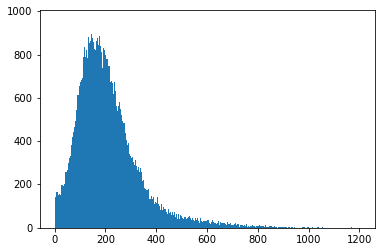

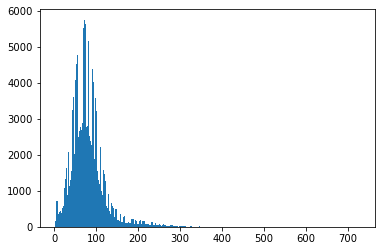

In [43]:
plt.hist(amt_of_words, bins = 1200)
plt.show()

plt.hist(amt_of_unique_words, bins = 500)
plt.show()  

In [2]:
with open('all_indexed_words.json','r') as jsonf:
    all_indexed_words = json.load(jsonf) 
with open('tracks_train.json','r') as tracks_file:
    tracks = json.load(tracks_file) 

In [3]:
for track in tracks:
    track['val'] = []
    track['ar'] = []
    track['dom'] = []
    track['count'] = 0
    for (k,v) in track['words'].items(): 
        k = str(int(k)-1)
        if ('nrc' in all_indexed_words[k] and int(k) > 25):
            if ((abs(float(all_indexed_words[k]['nrc']['valence'])-0.5) > 0.15  or 
                 abs(float(all_indexed_words[k]['nrc']['arousal'])-0.5) > 0.15  or 
                 abs(float(all_indexed_words[k]['nrc']['dominance'])-0.5) > 0.15 )):
                track['count'] += 1
                track['val'].append(float(all_indexed_words[k]['nrc']['valence']))
                track['ar'].append(float(all_indexed_words[k]['nrc']['arousal']))
                track['dom'].append(float(all_indexed_words[k]['nrc']['dominance']))
            #track['count'] += int(v)
            #track['val'].append(float(all_indexed_words[k]['nrc']['valence'])*int(v))
            #track['ar'].append(float(all_indexed_words[k]['nrc']['arousal'])*int(v))
            #track['dom'].append(float(all_indexed_words[k]['nrc']['dominance'])*int(v))
#print(tracks[2])          

In [4]:
usable_tracks = []
for track in tracks:
    if track['count'] > 5 and track['count'] < 100: 
        track['valence'] = np.median(track['val'])
        track['arousal'] = np.median(track['ar'])
        track['dominance'] = np.median(track['dom'])    
        #track.pop('val')
        #track.pop('ar')
        #track.pop('dom')
        usable_tracks.append(track)
#print(usable_tracks[2])
print(len(usable_tracks))

198450


In [2]:
match_dict = {}
with open('mxm_779k_matches.txt', 'r') as matches:  
    reader = matches.readlines()
    for line in reader:
        if line[0] != '#':
            tr = line.split('<SEP>')
            match_dict[tr[3]] = {'artist': tr[1],'title': tr[2]}


In [5]:
import pickle
pickle.dump( match_dict, open( "match_dict.p", "wb" ) )

In [6]:
for track in usable_tracks:
    if track['msd_id'] in match_dict:
        track['artist'] = match_dict[track['msd_id']]['artist']
        track['title'] = match_dict[track['msd_id']]['title']
    else: print('not matched')

In [8]:
with open('tracks_artist_name.json','w') as tracks_file:
    json.dump(usable_tracks,tracks_file) 

In [13]:
track_vectors = [[t['valence'],t['arousal'],t['dominance'],t['count']/300] for t in usable_tracks]
print(len(track_vectors))


201917


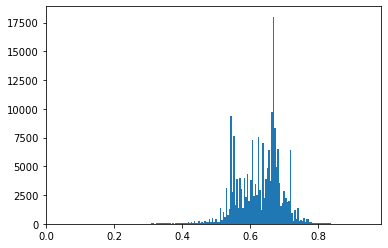

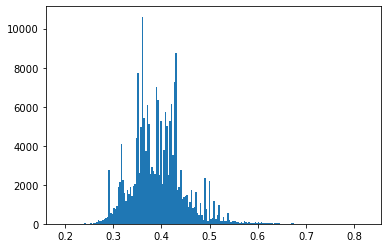

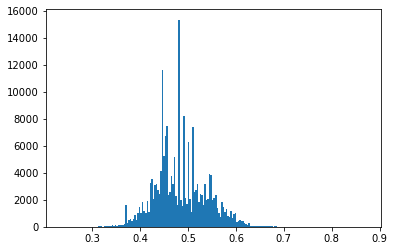

In [22]:
plt.hist([x['valence'] for x in usable_tracks], bins = 200)
plt.show()
plt.hist([x['arousal'] for x in usable_tracks], bins = 200)
plt.show()
plt.hist([x['dominance'] for x in usable_tracks], bins = 200)
plt.show()

In [14]:
X = np.array(track_vectors[:2000])
X_embedded = TSNE(n_components=2).fit_transform(X)
X_embedded.shape
plt.figure(figsize=(25, 25))
plt.scatter([i[0] for i in X_embedded],[i[1] for i in X_embedded],c='blue', s=4)

(2000, 2)

In [41]:
all_indexed_words['3295']

{'inside': True,
 'stem': 'disappoint',
 'words': ['disappoint',
  'disappointed',
  'disappointing',
  'disappointment',
  'disappointments',
  'disappoints',
  'disappoint'],
 'nrc': {'valence': '0.150', 'arousal': '0.633', 'dominance': '0.288'}}

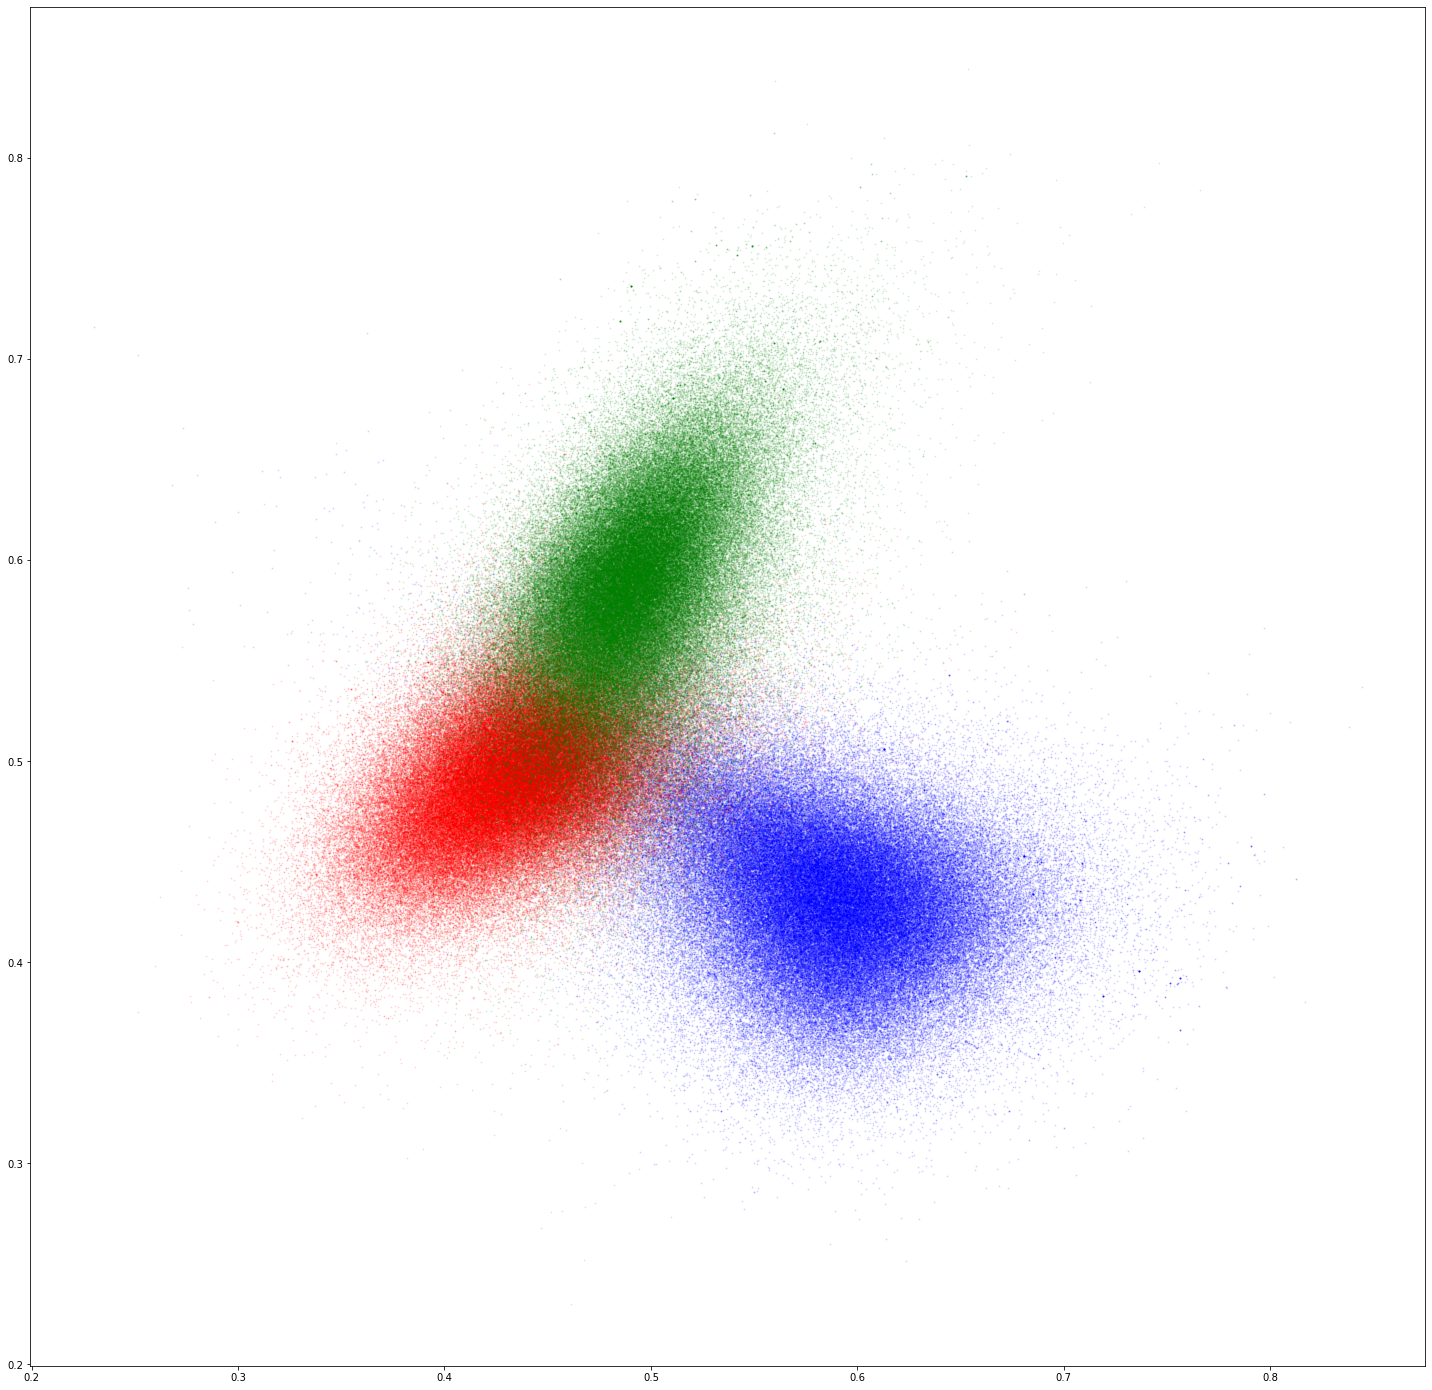

In [20]:
area = 1
plt.figure(figsize=(25, 25))
#plt.scatter([i[0] for i in X_embedded],[i[1] for i in X_embedded], s=area)

#ax = fig.add_subplot(1, 1, 1)
plt.scatter([i[0] for i in track_vectors],[i[1] for i in track_vectors],c='blue', 
            s=area, alpha=0.1)
plt.scatter([i[1] for i in track_vectors],[i[2] for i in track_vectors],c='red', 
            s=area, alpha=0.1)
plt.scatter([i[2] for i in track_vectors],[i[0] for i in track_vectors],c='green', 
            s=area, alpha=0.1)


In [31]:
#with open('failedReqs.json','r') as f_1:
#    failed_tracks = json.load(f_1)
#with open('searched_tracks.json','r') as f_1:
#    searched_tracks = json.load(f_1) 
    
unsearched = []
for t in tracks:
    if not t['id'] in searched_tracks:
        unsearched.append(t['id'])
        
print(len(unsearched))
print(len(tracks))
print(unsearched[0])

206519
210519
4554642


In [32]:
base_url = 'https://api.musixmatch.com/ws/1.1/track.get?format=json&callback=callback&track_id=${}&apikey=8adfcf7dfe3998423977a3370864cdb5'
#searched_tracks = []
failed = []
#track_infos = {}
with open('newInfos.json','r') as f_2:
    track_infos = json.load(f_2)

i = 0
for track in unsearched[0:1000]:
    new_url = base_url.replace('${}',track)
    
    r = requests.get(new_url)
    if r.status_code == 200:
        res = r.json()
        if res['message']['header']['status_code'] == 200:
            track_infos[str(track)] = res['message']['body']['track']
        else:
            if i % 10 == 0:
                print(i)
            failed.append(track)
            i+= 1
        searched_tracks.append(track)




0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170


In [34]:
with open('newInfos.json','w') as f:
    json.dump(track_infos,f)
with open('failedReqs.json','w') as f:
    json.dump(failed,f) 
with open('searched_tracks.json','w') as f:
    json.dump(searched_tracks,f) 